In [1]:
!pip install tensorflow  opencv-python matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf


import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os


In [2]:
train = tf.keras.utils.image_dataset_from_directory(r'C:\Users\HP\Downloads\hand x ray clssifire\New folder (2)\train',shuffle = True)
test = tf.keras.utils.image_dataset_from_directory(r'C:\Users\HP\Downloads\hand x ray clssifire\New folder (2)\test',shuffle = False)
val = tf.keras.utils.image_dataset_from_directory(r'C:\Users\HP\Downloads\hand x ray clssifire\New folder (2)\val',shuffle = False)


Found 7727 files belonging to 2 classes.
Found 2200 files belonging to 2 classes.
Found 1099 files belonging to 2 classes.


In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 11000 files belonging to 2 classes.


In [4]:
class_names = train.class_names

# Get the number of classes
num_classes = len(class_names)



In [5]:
# Print the class names and the number of classes
print("Class Names:", class_names)
print("Number of Classes:", num_classes)



Class Names: ['fractured', 'not fractured']
Number of Classes: 2


In [6]:
#Number of images in classes

class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the dataset and count the images for each class
for images, labels in data:
    for label in labels:
        class_name = class_names[label]
        class_counts[class_name] += 1

# Print the counts for each class
for class_name in class_counts:
    print(f"Number of images in class '{class_name}': {class_counts[class_name]}")

Number of images in class 'fractured': 6559
Number of images in class 'not fractured': 4441


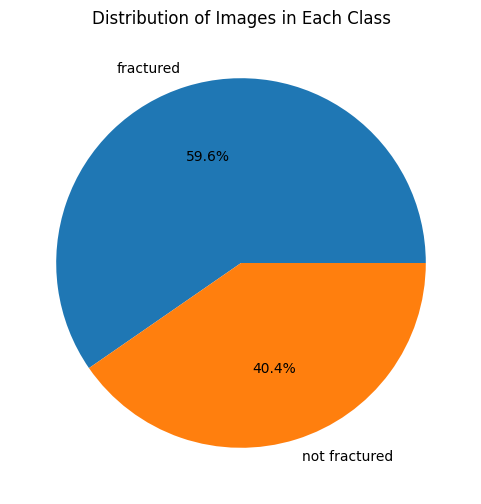

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Images in Each Class')
plt.show()


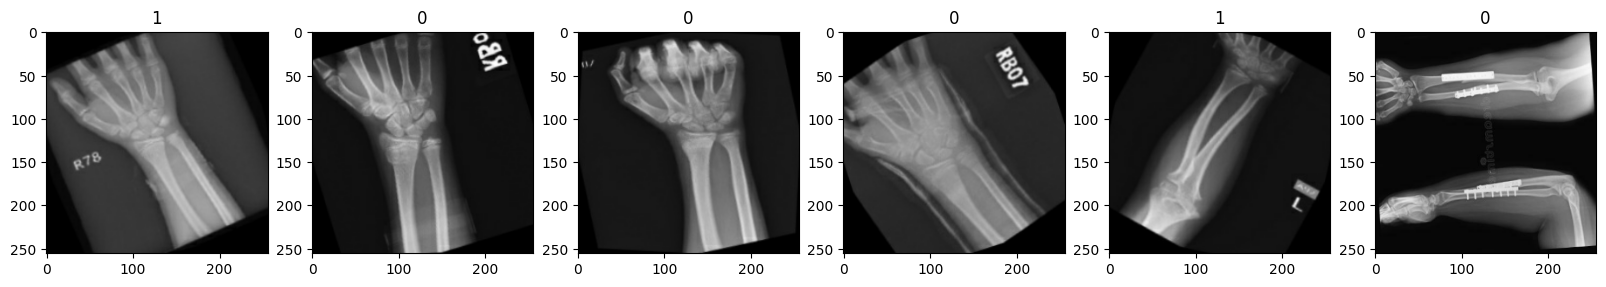

In [8]:
data_iterator = train.as_numpy_iterator()
batch=data_iterator.next()

fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
train = train.map(lambda x,y: (x/255, y))
batch[0].max()

255.0

In [10]:
train.as_numpy_iterator().next()[0].max()


1.0

In [11]:
len(train)

242

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model1 = Sequential()
#relu يحول اي قيمة سالبة الى 0 والموجب يبقى كما هو
model1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D())

model1.add(Conv2D(32, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())

model1.add(Conv2D(16, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))#output ,sigmoid تأخذ قيمة بين 0و1

In [13]:
model1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model1.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])


In [34]:
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score
def display_confusion_matrix(model, dataset,num_classes):

    y_true = np.concatenate([label.numpy() for _, label in dataset], axis=0)

    y_pred = model.predict(dataset.map(lambda image, label: image))
    if num_classes == 2:
        y_pred_labels = [1 if y >= 0.5 else 0 for y in y_pred]
    else:
        y_pred_labels = np.argmax(y_pred,axis = 1)
    cm = tf.math.confusion_matrix(y_true, y_pred_labels)
    cm = cm.numpy()/len(y_true)
    print(f1_score(y_true,y_pred_labels))
    print(accuracy_score(y_true,y_pred_labels))
    
    plt.figure(figsize=(14, 6))
    sns.heatmap(cm, annot=True, cmap='Greens')
    plt.title('Confusion Matrix', fontsize=20)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()

69/69 [==============================] - 17s 239ms/step
0.9432506887052342
0.9531818181818181


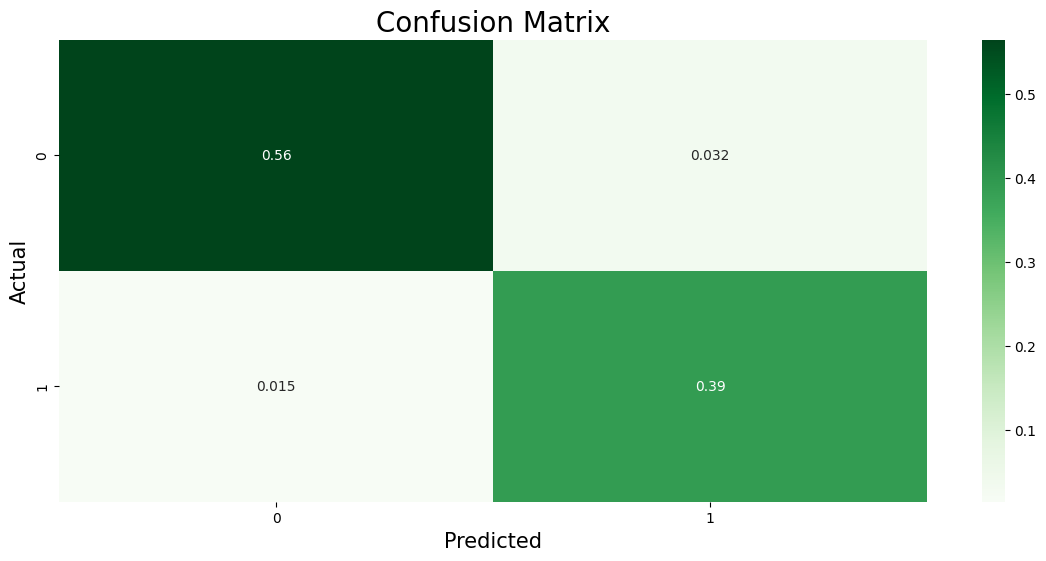

In [35]:
 display_confusion_matrix(model1,test,2)

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

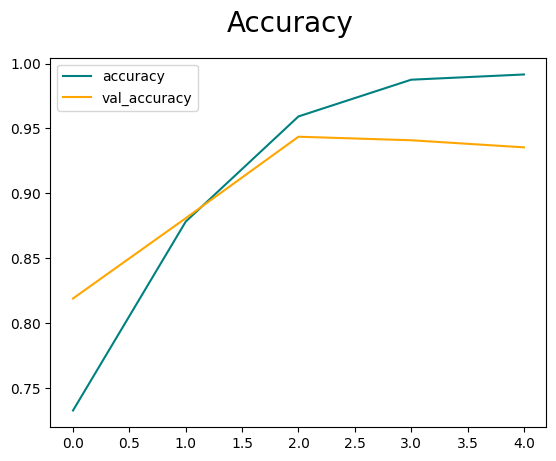

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
test_loss, test_accuracy = model1.evaluate(test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


69/69 [==============================] - 22s 304ms/step - loss: 63.2040 - accuracy: 0.9532
Test Loss: 63.2039909362793
Test Accuracy: 0.953181803226471


undersampling

In [62]:
import os
import random
from shutil import copyfile

# Define the paths to the original data and the destination folder for oversampled data
original_data_dir = 'data'
oversampled_data_dir = "fractured"


fractured_files = [file for file in os.listdir(os.path.join(original_data_dir, 'fractured')) if file.endswith('.jpg')]

# Shuffle the list of 'fractured' files to randomly select samples for undersampling
random.shuffle(fractured_files)

# Get the number of 'not fractured' samples (assuming it's the smaller class)
not_fractured_samples = 4441

# Undersample the 'fractured' class by copying a subset of images to the destination folder
def undersample_images():
    for i in range(not_fractured_samples):
        file = fractured_files[i]
        file_path = os.path.join(original_data_dir, 'fractured', file)
        new_file_path = os.path.join('New folder', file)
        copyfile(file_path, new_file_path)

# Call the function to perform the undersampling
undersample_images()

KeyboardInterrupt: 

In [63]:
import os
import shutil
import random
import math
def split_dataset(dataset_dir, train_dir, test_dir, val_dir, train_percent=0.7, test_percent=0.2, val_percent=0.1):
    """
    Split a dataset into training, testing, and validation sets.

    Parameters:
    - dataset_dir (str): The path to the dataset directory containing class folders.
    - train_dir (str): The path to the directory where the training data will be stored.
    - test_dir (str): The path to the directory where the testing data will be stored.
    - val_dir (str): The path to the directory where the validation data will be stored.
    - train_percent (float): The percentage of data to be allocated for training (default is 0.7).
    - test_percent (float): The percentage of data to be allocated for testing (default is 0.2).
    - val_percent (float): The percentage of data to be allocated for validation (default is 0.1).

    This function creates a new directory structure with training, testing, and validation splits
    based on the provided percentages. It iterates through each class folder in the dataset directory,
    shuffles the images, and moves them to their respective splits.

    Returns:
    None
    """
    # Create the new directory structure
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Iterate through each class folder
    for class_folder in os.listdir(dataset_dir):
        if os.path.isdir(os.path.join(dataset_dir, class_folder)):
            class_path = os.path.join(dataset_dir, class_folder)
            train_class_path = os.path.join(train_dir, class_folder)
            test_class_path = os.path.join(test_dir, class_folder)
            val_class_path = os.path.join(val_dir, class_folder)

            os.makedirs(train_class_path, exist_ok=True)
            os.makedirs(test_class_path, exist_ok=True)
            os.makedirs(val_class_path, exist_ok=True)

            # Get the list of image files in the class folder
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            num_images = len(image_files)

            # Calculate the number of images for each split
            num_train = math.ceil(num_images * train_percent)
            num_test = math.ceil(num_images * test_percent)
            num_val = num_images - num_train - num_test

            # Shuffle the list of image files
            random.shuffle(image_files)

            # Move images to their respective splits
            for i, image_file in enumerate(image_files):
                src_path = os.path.join(class_path, image_file)
                if i < num_train:
                    dst_path = os.path.join(train_class_path, image_file)
                elif i < num_train + num_test:
                    dst_path = os.path.join(test_class_path, image_file)
                else:
                    dst_path = os.path.join(val_class_path, image_file)

                shutil.copy(src_path, dst_path)
dataset_dir = r'C:\Users\HP\Downloads\hand x ray clssifire\dataundersample'
train_dir = r'C:\Users\HP\Downloads\hand x ray clssifire\after\train1'
test_dir = r'C:\Users\HP\Downloads\hand x ray clssifire\after\test1'
val_dir = r'C:\Users\HP\Downloads\hand x ray clssifire\after\val1'

split_dataset(dataset_dir, train_dir, test_dir, val_dir)

In [19]:
train1 = tf.keras.utils.image_dataset_from_directory(r'C:\Users\HP\Downloads\hand x ray clssifire\after\train1',shuffle = True)
test1 = tf.keras.utils.image_dataset_from_directory(r'C:\Users\HP\Downloads\hand x ray clssifire\after\test1',shuffle = False)
val1 = tf.keras.utils.image_dataset_from_directory(r'C:\Users\HP\Downloads\hand x ray clssifire\after\val1',shuffle = False)


Found 6217 files belonging to 2 classes.
Found 1777 files belonging to 2 classes.
Found 887 files belonging to 2 classes.


In [20]:

#Number of images in classes

class_counts = {class_name: 0 for class_name in class_names}

# Iterate through the dataset and count the images for each class
for images, labels in train1:
    for label in labels:
        class_name = class_names[label]
        class_counts[class_name] += 1

# Print the counts for each class
for class_name in class_counts:
    print(f"Number of images in class '{class_name}': {class_counts[class_name]}")


Number of images in class 'fractured': 3109
Number of images in class 'not fractured': 3108


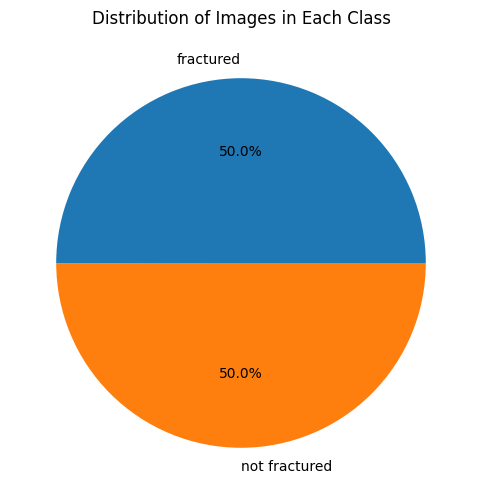

In [21]:
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Images in Each Class')
plt.show()

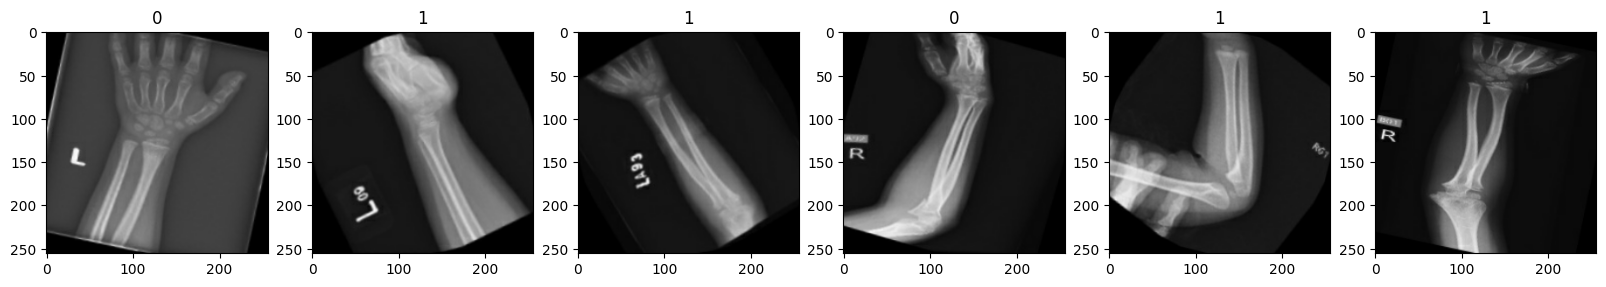

In [22]:
data_iterator = train1.as_numpy_iterator()
batch=data_iterator.next()

fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data1 = train1.map(lambda x,y: (x/255, y))
batch[0].max()

255.0

In [24]:
len(train1)

195

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [26]:
model2 = Sequential()
#relu يحول اي قيمة سالبة الى 0 والموجب يبقى كما هو
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))#output ,sigmoid تأخذ قيمة بين 0و1

In [27]:
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [73]:
model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 16)      

In [74]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model2.fit(train1, epochs=10, validation_data=val1, callbacks=[tensorboard_callback])


Epoch 1/10
195/195 [==============================] - 233s 1s/step - loss: 3.7275 - accuracy: 0.7468 - val_loss: 0.4009 - val_accuracy: 0.8286
Epoch 2/10
195/195 [==============================] - 239s 1s/step - loss: 0.2107 - accuracy: 0.9144 - val_loss: 0.2161 - val_accuracy: 0.9301
Epoch 3/10
195/195 [==============================] - 232s 1s/step - loss: 0.0907 - accuracy: 0.9680 - val_loss: 0.2341 - val_accuracy: 0.9290
Epoch 4/10
195/195 [==============================] - 226s 1s/step - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.3274 - val_accuracy: 0.9121
Epoch 5/10
195/195 [==============================] - 226s 1s/step - loss: 0.0453 - accuracy: 0.9826 - val_loss: 0.3203 - val_accuracy: 0.9312
Epoch 6/10
195/195 [==============================] - 231s 1s/step - loss: 0.0318 - accuracy: 0.9913 - val_loss: 0.3342 - val_accuracy: 0.9222
Epoch 7/10
195/195 [==============================] - 228s 1s/step - loss: 0.0280 - accuracy: 0.9921 - val_loss: 0.2920 - val_accuracy: 0.9312

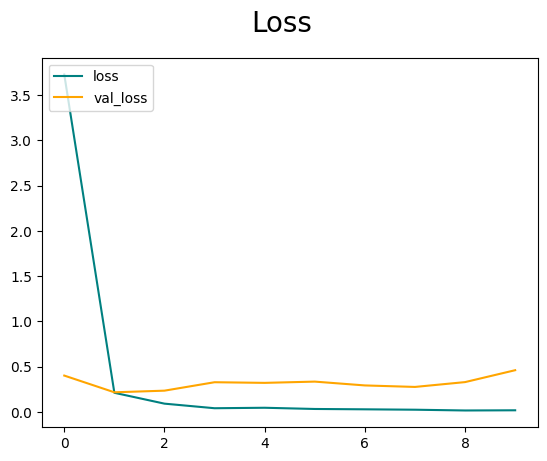

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

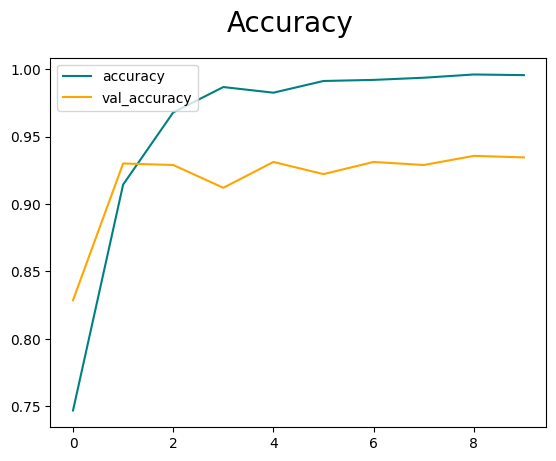

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [77]:
test_loss, test_accuracy = model2.evaluate(test1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


56/56 [==============================] - 17s 303ms/step - loss: 0.4804 - accuracy: 0.9364
Test Loss: 0.4804384112358093
Test Accuracy: 0.9364096522331238


In [36]:
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score
def display_confusion_matrix(model, dataset,num_classes):

    y_true = np.concatenate([label.numpy() for _, label in dataset], axis=0)

    y_pred = model.predict(dataset.map(lambda image, label: image))
    if num_classes == 2:
        y_pred_labels = [1 if y >= 0.5 else 0 for y in y_pred]
    else:
        y_pred_labels = np.argmax(y_pred,axis = 1)
    cm = tf.math.confusion_matrix(y_true, y_pred_labels)
    cm = cm.numpy()/len(y_true)
    print(f1_score(y_true,y_pred_labels))
    print(accuracy_score(y_true,y_pred_labels))
    
    plt.figure(figsize=(14, 6))
    sns.heatmap(cm, annot=True, cmap='Greens')
    plt.title('Confusion Matrix', fontsize=20)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()

56/56 [==============================] - 14s 247ms/step
0.9378095762245459
0.9364096792346651


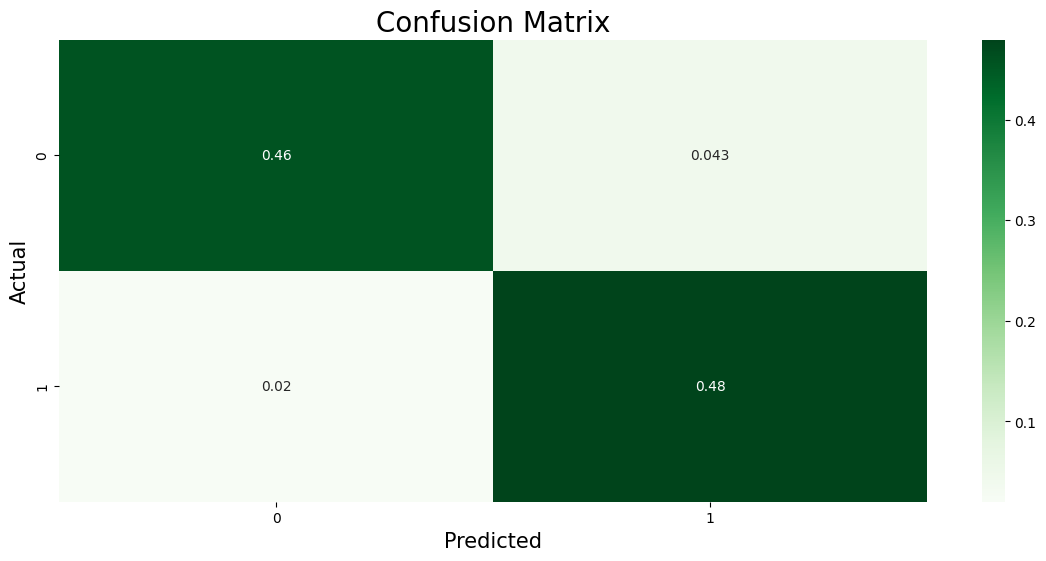

In [37]:
display_confusion_matrix(model2, test1,2)

In [28]:
model3 = Sequential()
#relu يحول اي قيمة سالبة الى 0 والموجب يبقى كما هو

model3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model3.add(MaxPooling2D())

model3.add(Conv2D(32, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(16, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(16, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))#output ,sigmoid تأخذ قيمة بين 0و1

In [29]:
model3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [84]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model3.fit(train1, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/10
195/195 [==============================] - 167s 853ms/step - loss: 0.6567 - accuracy: 0.7248 - val_loss: 0.3724 - val_accuracy: 0.8217
Epoch 2/10
195/195 [==============================] - 157s 803ms/step - loss: 0.2808 - accuracy: 0.8872 - val_loss: 0.2045 - val_accuracy: 0.9208
Epoch 3/10
195/195 [==============================] - 159s 813ms/step - loss: 0.1300 - accuracy: 0.9530 - val_loss: 0.1633 - val_accuracy: 0.9463
Epoch 4/10
195/195 [==============================] - 216s 1s/step - loss: 0.0806 - accuracy: 0.9715 - val_loss: 0.2516 - val_accuracy: 0.9227
Epoch 5/10
195/195 [==============================] - 214s 1s/step - loss: 0.0574 - accuracy: 0.9807 - val_loss: 0.1537 - val_accuracy: 0.9509
Epoch 6/10
195/195 [==============================] - 214s 1s/step - loss: 0.0506 - accuracy: 0.9826 - val_loss: 0.0860 - val_accuracy: 0.9763
Epoch 7/10
195/195 [==============================] - 213s 1s/step - loss: 0.0335 - accuracy: 0.9903 - val_loss: 0.1010 - val_accurac

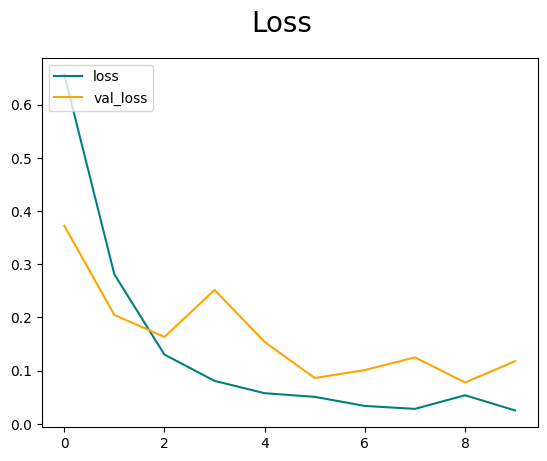

In [85]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

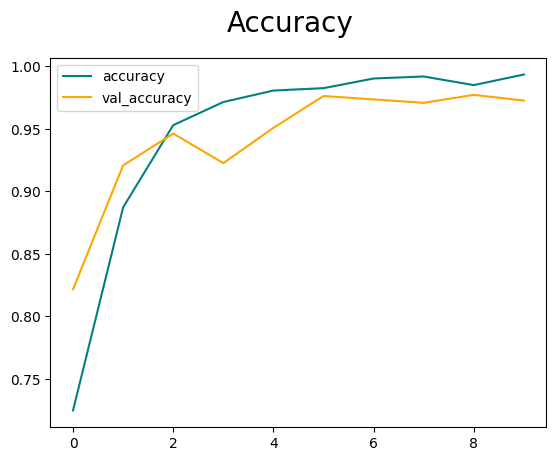

In [86]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [87]:
test_loss, test_accuracy = model3.evaluate(test1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


56/56 [==============================] - 17s 300ms/step - loss: 0.2849 - accuracy: 0.9544
Test Loss: 0.2849341928958893
Test Accuracy: 0.9544175863265991


In [38]:
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score
def display_confusion_matrix(model, dataset,num_classes):

    y_true = np.concatenate([label.numpy() for _, label in dataset], axis=0)

    y_pred = model.predict(dataset.map(lambda image, label: image))
    if num_classes == 2:
        y_pred_labels = [1 if y >= 0.5 else 0 for y in y_pred]
    else:
        y_pred_labels = np.argmax(y_pred,axis = 1)
    cm = tf.math.confusion_matrix(y_true, y_pred_labels)
    cm = cm.numpy()/len(y_true)
    print(f1_score(y_true,y_pred_labels))
    print(accuracy_score(y_true,y_pred_labels))
    
    plt.figure(figsize=(14, 6))
    sns.heatmap(cm, annot=True, cmap='Greens')
    plt.title('Confusion Matrix', fontsize=20)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()

56/56 [==============================] - 11s 194ms/step
0.9546726357022943
0.9544175576814856


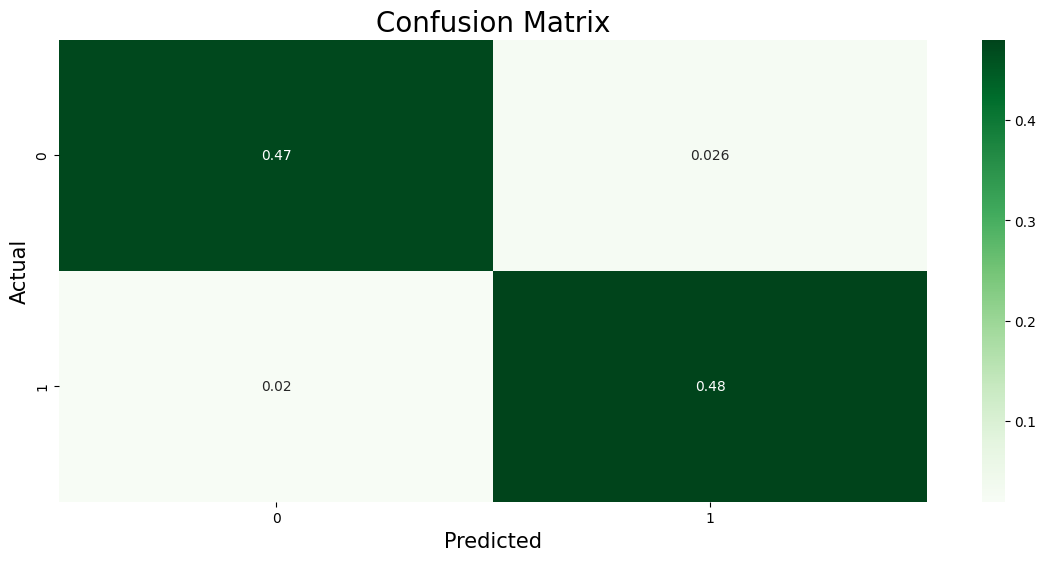

In [39]:
display_confusion_matrix(model3, test1,2)

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model1.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 172ms/step


In [43]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.92340887, shape=(), dtype=float32) tf.Tensor(0.963964, shape=(), dtype=float32) tf.Tensor(0.9531818, shape=(), dtype=float32)


In [44]:
import cv2



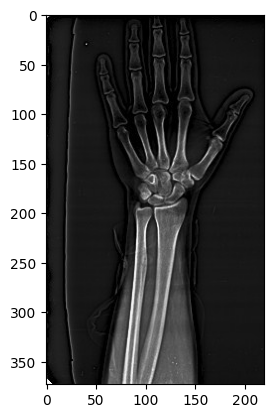

In [45]:
img1 = cv2.imread('77.jpg')
plt.imshow(img1)
plt.show()

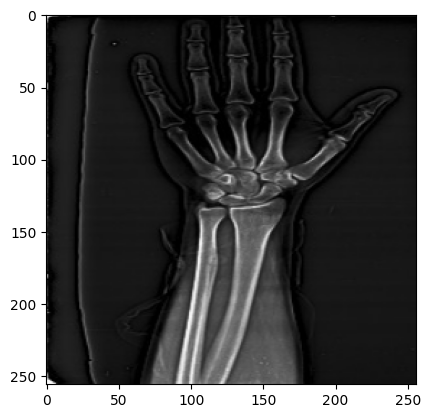

In [46]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:

yhat1 = model1.predict(np.expand_dims(resize, 0))
yhat2 = model2.predict(np.expand_dims(resize, 0))
yhat3 = model3.predict(np.expand_dims(resize, 0))

# Decide on a strategy to combine the predictions (e.g., majority voting)
combined_prediction = (yhat1+yhat2+yhat3) / 3  # You can use a different combination strategy
# Make the final classification decision
if combined_prediction > 0.5:
    print('Predicted class is not fractured')
else:
    print('Predicted class is fractured')
print(combined_prediction)

1/1 [==============================] - 0s 27ms/step
Predicted class is not fractured
[[0.717813]]


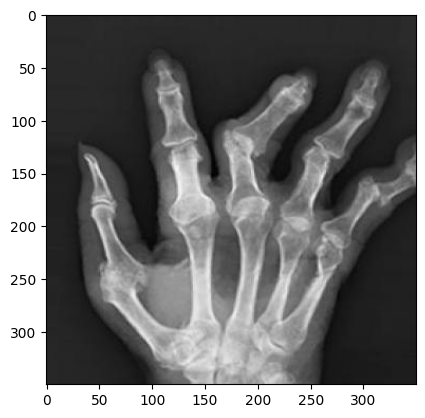

In [49]:
img2 = cv2.imread('all_0_7218_png.rf.c23e459ff506f2df0509ce978e9ffbcb.jpg')
plt.imshow(img2)
plt.show()

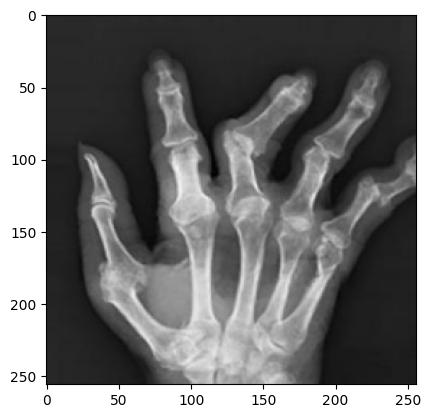

In [50]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:

yhat1 = model1.predict(np.expand_dims(resize, 0))
yhat2 = model2.predict(np.expand_dims(resize, 0))
yhat3 = model3.predict(np.expand_dims(resize, 0))

# Decide on a strategy to combine the predictions (e.g., majority voting)
combined_prediction = (yhat1+yhat2+yhat3) / 3  # You can use a different combination strategy
# Make the final classification decision
if combined_prediction > 0.5:
    print('Predicted class is not fractured')
else:
    print('Predicted class is fractured')
if combined_prediction <0:
    print(combined_prediction)
else: 
    print(yhat1)

1/1 [==============================] - 0s 32ms/step
Predicted class is fractured
[[0.]]


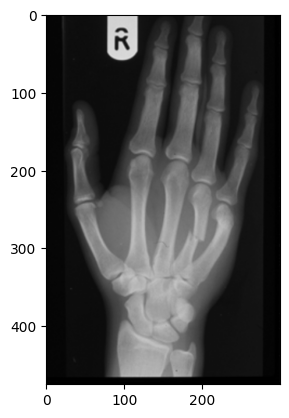

In [62]:
img3 = cv2.imread('x-ray-1.png')
plt.imshow(img3)
plt.show()

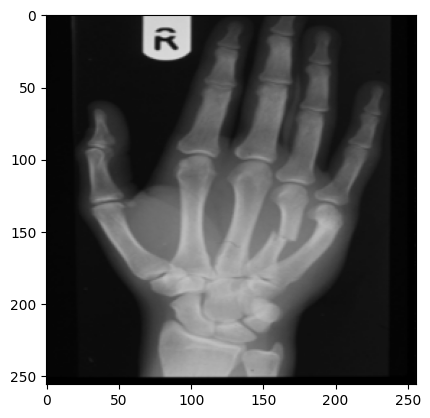

In [63]:
resize = tf.image.resize(img3, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:

yhat1 = model1.predict(np.expand_dims(resize, 0))
yhat2 = model2.predict(np.expand_dims(resize, 0))
yhat3 = model3.predict(np.expand_dims(resize, 0))

# Decide on a strategy to combine the predictions (e.g., majority voting)
combined_prediction = (yhat1+yhat2+yhat3) / 3  # You can use a different combination strategy
# Make the final classification decision
if combined_prediction > 0.5:
    print('Predicted class is not fractured')
else:
    print('Predicted class is fractured')
if combined_prediction <0:
    print(combined_prediction)
else: 
    print(yhat1)

1/1 [==============================] - 0s 19ms/step
Predicted class is fractured
[[0.]]


In [32]:
model1.save(r"C:\Users\HP\Downloads\hand x ray clssifire\model1.h5")
model2.save(r"C:\Users\HP\Downloads\hand x ray clssifire\model2.h5")
model3.save(r"C:\Users\HP\Downloads\hand x ray clssifire\model3.h5")

In [33]:
model1.load_weights(r"C:\Users\HP\Downloads\hand x ray clssifire\model1.h5")
model2.load_weights(r"C:\Users\HP\Downloads\hand x ray clssifire\model2.h5")
model3.load_weights(r"C:\Users\HP\Downloads\hand x ray clssifire\model3.h5")